## Election Ad Spending Analysis

In [35]:
import pandas as pd

In [36]:
advertisers = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\excel books\\elections-data\\advertisers.csv")
locations = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\excel books\\elections-data\\locations.csv")
results = pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\excel books\\elections-data\\results.csv")

In [37]:
advertisers.tail(10)

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
20822,100192222859401,Hakki Pikki Adivasi Karnataka,These ads ran without a disclaimer,≤100,1
20823,110409798750264,Ana Garcia,These ads ran without a disclaimer,≤100,2
20824,242822678921546,Adem,These ads ran without a disclaimer,≤100,2
20825,109172399106517,El Grupo Informático,These ads ran without a disclaimer,≤100,2
20826,228947769047192,Giả Khai,These ads ran without a disclaimer,≤100,1
20827,104633268709556,If You Don't Bark,These ads ran without a disclaimer,≤100,2
20828,118271861357765,Story time,These ads ran without a disclaimer,≤100,1
20829,218017134738366,know_sacred_wisdom,These ads ran without a disclaimer,≤100,1
20830,270489126793,Energy Globe Award,These ads ran without a disclaimer,≤100,1
20831,114025938452734,FactFusion,These ads ran without a disclaimer,≤100,1


In [38]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [39]:
results.head()

,_id,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1
1,2,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1
2,3,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1
3,4,Assam,Dibrugarh,1659588,76.75,1273744,1
4,5,Assam,Jorhat,1727121,79.89,1379749,1


In [75]:
results['State']=results['State'].replace(to_replace='Andaman & Nicobar Islands', value='Andaman and Nicobar Islands')

In [76]:
results['State'] = results['State'].str.strip().str.lower()   

In [77]:
locations['Location name'] = locations['Location name'].str.strip().str.lower()

In [78]:
merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)
merged_data

,_id,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,andaman and nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1,andaman and nicobar islands,377858.0
1,2,arunachal pradesh,Arunachal East,375310,83.31,312658,1,arunachal pradesh,1385654.0
2,3,arunachal pradesh,Arunachal West,517384,73.60,380783,1,arunachal pradesh,1385654.0
3,4,assam,Dibrugarh,1659588,76.75,1273744,1,assam,17478091.0
4,5,assam,Jorhat,1727121,79.89,1379749,1,assam,17478091.0
...,...,...,...,...,...,...,...,...,...
538,545,west bengal,Jadavpur,2033525,76.68,1559330,7,west bengal,77244996.0
539,546,west bengal,Joynagar,1844780,80.08,1477298,7,west bengal,77244996.0
540,547,west bengal,Kolkata Dakshin,1849520,66.95,1238256,7,west bengal,77244996.0
541,548,west bengal,Kolkata Uttar,1505356,63.59,957319,7,west bengal,77244996.0


In [82]:
merged_data[merged_data['Amount spent (INR)'].isna()].count()

#nan_values=merged_data[merged_data['Location name'].isna()]
#nan_values

_id                   23
State                 23
PC_Name               23
Total Electors        23
Polled (%)            23
Total Votes           23
Phase                 23
Location name          0
Amount spent (INR)     0
dtype: int64

In [69]:
merged_data['State'].unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Jammu and Kashmir', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Puducherry', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Karnataka', 'Kerala', 'Dadra & Nagar Haveli and\nDaman & Diu',
       'Goa', 'Gujarat', 'Andhra Pradesh', 'Jharkhand', 'Odisha',
       'Telangana', 'Ladakh', 'Haryana', 'NCT OF Delhi', 'Chandigarh',
       'Himachal Pradesh', 'Punjab'], dtype=object)

In [70]:
locations['Location name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab region', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unknown',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [64]:
merged_data['Location name'].unique()

array([nan, 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh',
       'Jammu and Kashmir', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Puducherry', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Karnataka',
       'Kerala', 'Goa', 'Gujarat', 'Andhra Pradesh', 'Jharkhand',
       'Odisha', 'Telangana', 'Haryana', 'Chandigarh', 'Himachal Pradesh'],
      dtype=object)

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
Amount_spent = merged_data.groupby('State')['Amount spent (INR)'].sum()
Amount_spent = Amount_spent.sort_values(ascending=False)

In [83]:
Amount_spent=pd.DataFrame(Amount_spent)
Amount_spent

,Amount spent (INR)
State,
uttar pradesh,7.173450e+09
maharashtra,4.892020e+09
odisha,3.785298e+09
west bengal,3.244290e+09
tamil nadu,2.988282e+09
andhra pradesh,2.520493e+09
bihar,2.144770e+09
karnataka,1.166463e+09
madhya pradesh,1.159796e+09


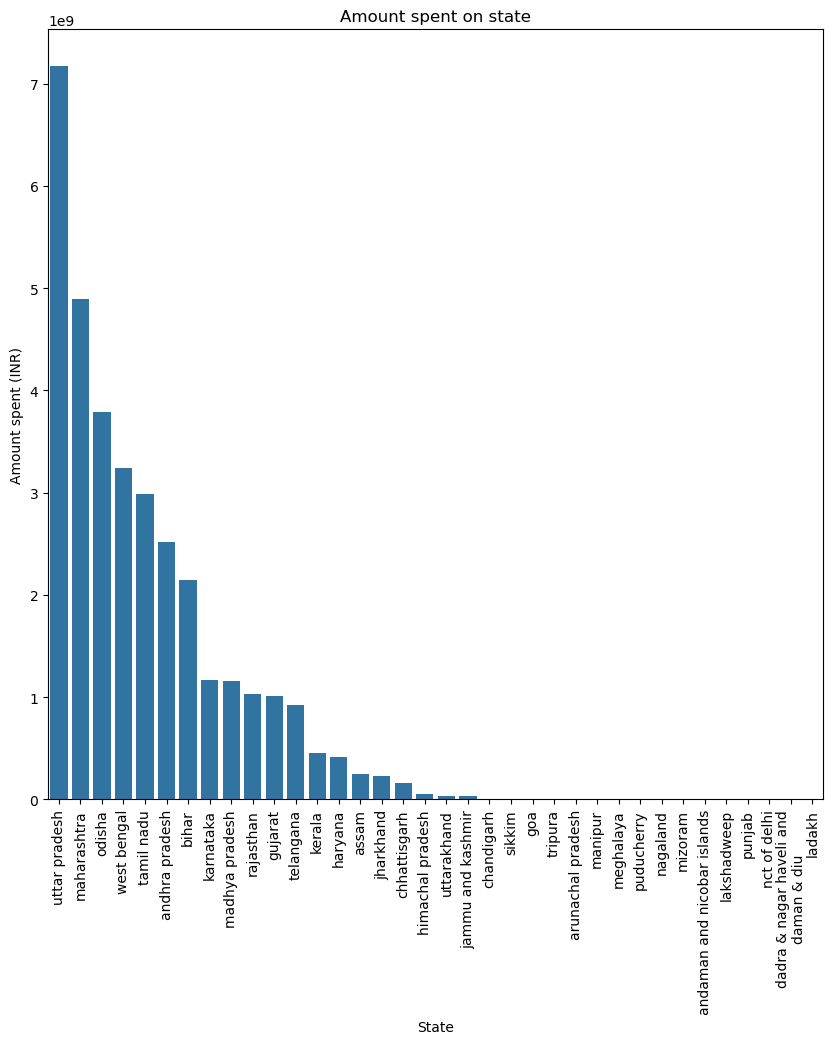

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(data=Amount_spent,x='State',y='Amount spent (INR)')
plt.xticks(rotation=90)
plt.title('Amount spent on state')
plt.show()

In [15]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean()

In [16]:
state_voter_turnout = state_voter_turnout.sort_values(ascending=False)

In [17]:
state_voter_turnout=pd.DataFrame(state_voter_turnout)

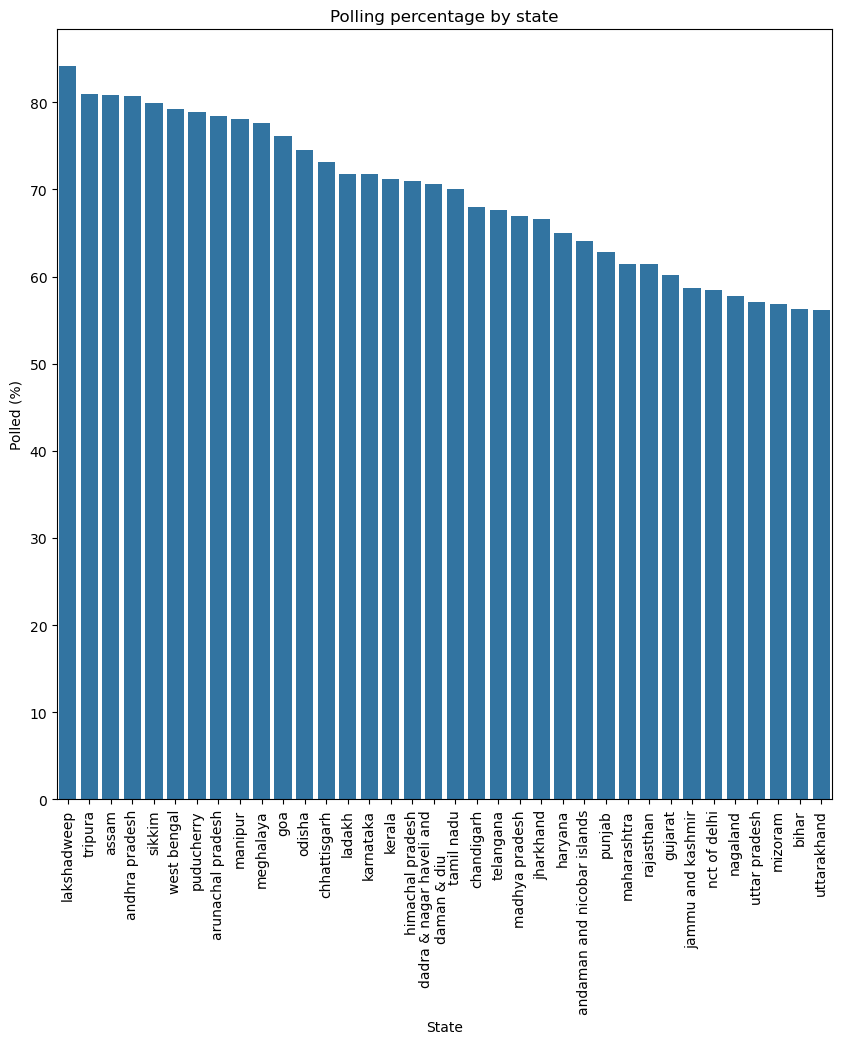

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(data=state_voter_turnout,x='State',y='Polled (%)')
plt.xticks(rotation=90)
plt.title('Polling percentage by state')
plt.show()

In [19]:
results

,_id,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,andaman and nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1
1,2,arunachal pradesh,Arunachal East,375310,83.31,312658,1
2,3,arunachal pradesh,Arunachal West,517384,73.60,380783,1
3,4,assam,Dibrugarh,1659588,76.75,1273744,1
4,5,assam,Jorhat,1727121,79.89,1379749,1
...,...,...,...,...,...,...,...
538,545,west bengal,Jadavpur,2033525,76.68,1559330,7
539,546,west bengal,Joynagar,1844780,80.08,1477298,7
540,547,west bengal,Kolkata Dakshin,1849520,66.95,1238256,7
541,548,west bengal,Kolkata Uttar,1505356,63.59,957319,7


In [20]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [21]:
#advertisers['Amount spent (INR)'] = advertisers['Amount spent (INR)'].astype(int)

In [22]:
advertisers['Amount spent (INR)']=advertisers['Amount spent (INR)'].replace(to_replace = '≤100' , value=100 )  

In [23]:
advertisers['Amount spent (INR)']=advertisers['Amount spent (INR)'].astype(int)

In [24]:
party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending = False)

In [25]:
party_ad_spend = pd.DataFrame(party_ad_spend).head(5)
party_ad_spend

,Amount spent (INR)
Page name,
Bharatiya Janata Party (BJP),193854342
Ama Chinha Sankha Chinha,112412941
Indian National Congress,108787100
Ellorum Nammudan,23806041
BJP Odisha,19573782


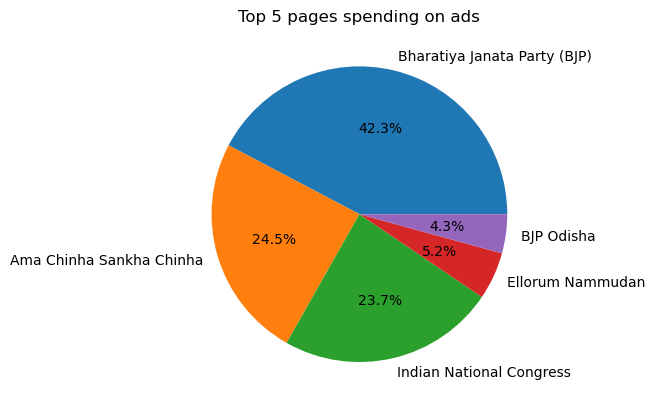

In [26]:
labels = party_ad_spend.index
sizes = party_ad_spend['Amount spent (INR)']


plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)


plt.title('Top 5 pages spending on ads')


plt.show()

In [27]:
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.009803
Polled (%)                   -0.009803    1.000000


<AxesSubplot:>

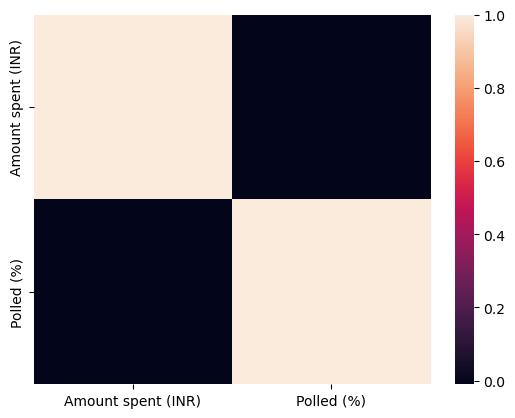

In [28]:
sns.heatmap(correlation)

## there is no corelation

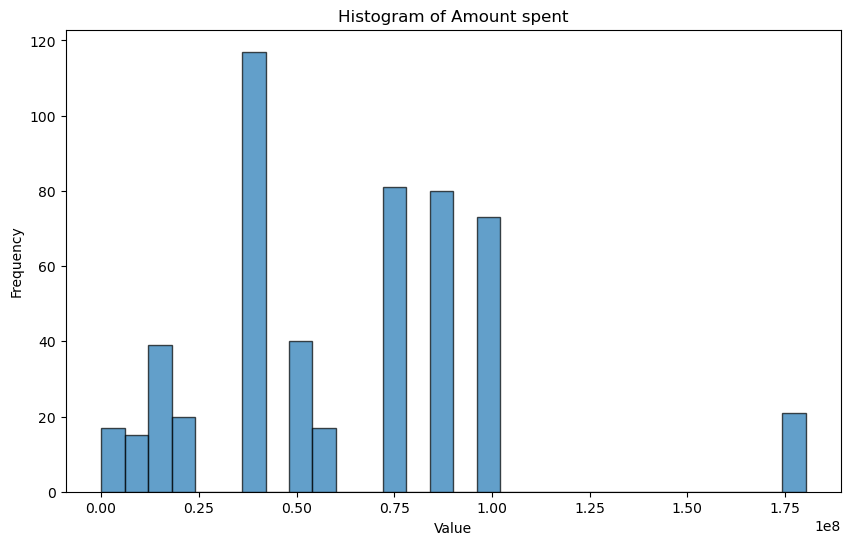

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Amount spent (INR)'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Amount spent')
plt.show()

In [30]:
merged_data.head()

,_id,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,andaman and nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1,andaman and nicobar islands,377858.0
1,2,arunachal pradesh,Arunachal East,375310,83.31,312658,1,arunachal pradesh,1385654.0
2,3,arunachal pradesh,Arunachal West,517384,73.60,380783,1,arunachal pradesh,1385654.0
3,4,assam,Dibrugarh,1659588,76.75,1273744,1,assam,17478091.0
4,5,assam,Jorhat,1727121,79.89,1379749,1,assam,17478091.0


### Analysis by phases

In [31]:
by_phase_pp = merged_data.groupby('Phase')['Polled (%)'].mean()
by_phase_pp = pd.DataFrame(by_phase_pp)

In [32]:
by_phase = merged_data.groupby('Phase')['Amount spent (INR)'].sum()
by_phase = pd.DataFrame(by_phase)

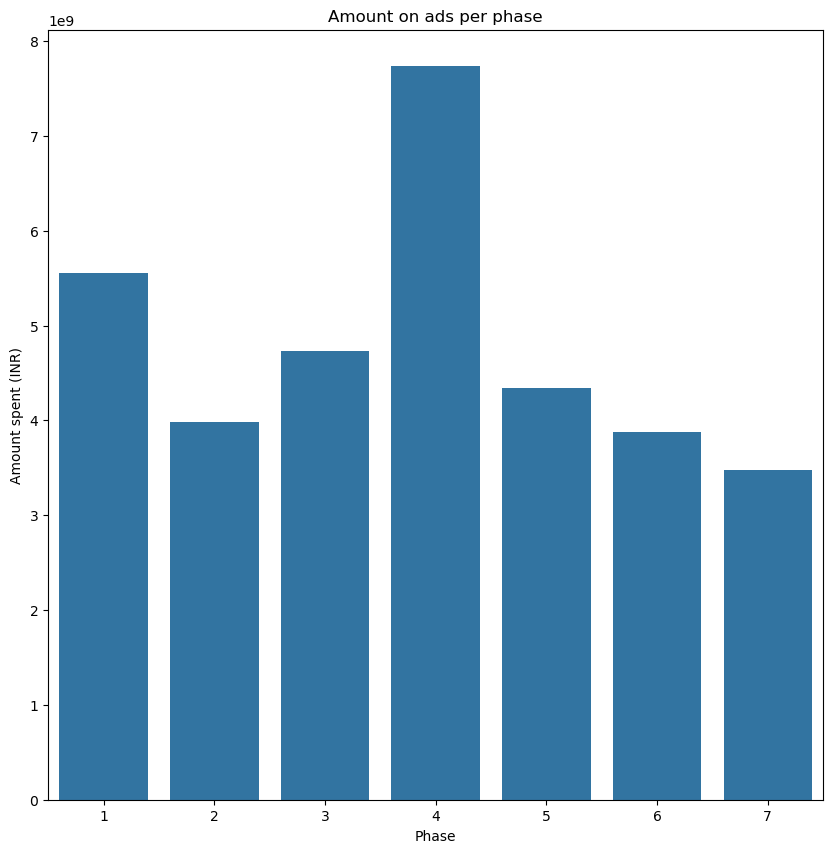

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 10))
sns.barplot(data=by_phase,x='Phase',y='Amount spent (INR)',ax=ax1)
plt.title('Amount on ads per phase' )
plt.show()